### Score: `[55]`

Q1. `[16.5]` good job

Q2. `[22]` good job

Q3. `[16.5]` good job

In [1]:
q1_path = '..\\Assignment_rd_common_files\\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
q2_path = '..\\Assignment_rd_common_files\\NOAA_NCDC_ERSST_v3b_SST.nc'

# Assignment#3 ZHAO Dongwei SID:12432909

## 1. Global methane levels from 2002

### 1.1 [5 points] Compute methane climatology for each month, and plot your results in 12 panels.

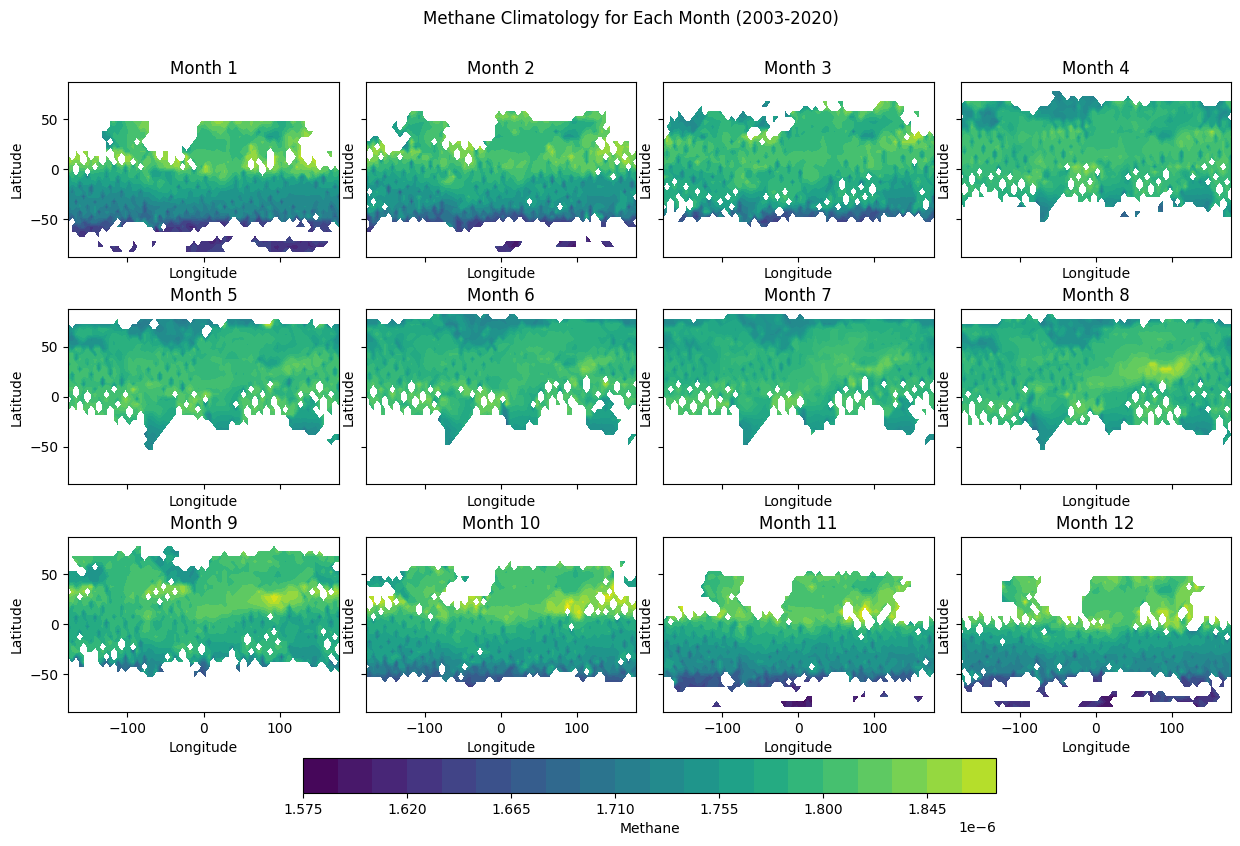

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

data = xr.open_dataset(q1_path, 
                       engine="netcdf4")

xch4_climatology = data['xch4'].groupby('time.month').mean(dim='time').load()

# 设置绘图区域与颜色条范围
fig, axes = plt.subplots(3, 4, figsize=(15, 9), sharex=True, sharey=True)
vmin, vmax = xch4_climatology.min(), xch4_climatology.max()

# 绘制12个月的气候态图
for month in range(1, 13):
    ax = axes[(month-1) // 4, (month-1) % 4]  # 计算并定位子图位置
    #绘制等高线图，使图片中呈现的甲烷分布更平滑
    im = ax.contourf(xch4_climatology['lon'], xch4_climatology['lat'], 
                     xch4_climatology.sel(month=month), levels=20, vmin=vmin, vmax=vmax, 
                     cmap='viridis')                         #统一子图映射范围，便于比较
    ax.set_title(f"Month {month}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# 在整个图形底部添加颜色条
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', 
                    fraction=0.05, pad=0.08)
cbar.set_label("Methane")

plt.suptitle("Methane Climatology for Each Month (2003-2020)")
#调整子图间距以及图形分布
plt.subplots_adjust(top=0.9, bottom=0.2, hspace=0.3, wspace=0.1) 
plt.show()

### 1.2 [5 points] Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

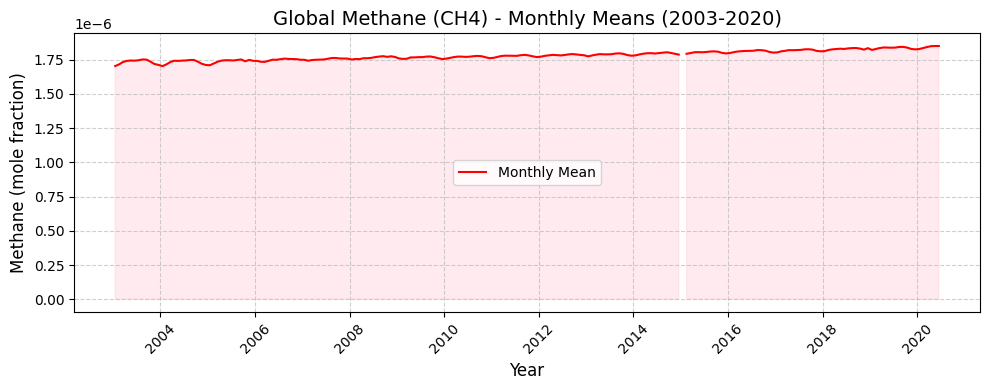

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

data = xr.open_dataset(q1_path, 
                       engine="netcdf4")

time = data['time'].values
xch4_global_mean = data['xch4'].mean(dim=['lat', 'lon'])# 计算全球平均甲烷浓度

# 绘制全球平均甲烷浓度的时间序列图
plt.figure(figsize=(10, 4))
plt.plot(time, xch4_global_mean, color='red', linewidth=1.5, label="Monthly Mean")
plt.fill_between(time, xch4_global_mean, color='pink', alpha=0.3)#填充下部区域

# 设置图表标题和标签
plt.title("Global Methane (CH4) - Monthly Means (2003-2020)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Methane (mole fraction)", fontsize=12)
plt.legend()

# 设置日期格式
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

生成的全球甲烷浓度时间序列图展示了 2003 年至 2020 年期间的月均甲烷浓度，整体趋势逐年略微上升。参考图（从 1980 年至 2022 年）显示了甲烷浓度随时间的显著增长，并且波动较大，呈现出强烈的上升趋势。与参考图相比，所绘制的图观察到的全球甲烷平均浓度上升趋势并不明显。

### 1.3 [5 points] Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.

[          nan 1.6996242e-06           nan           nan           nan
           nan           nan           nan           nan 1.7043456e-06
 1.7193559e-06 1.7163834e-06           nan 1.6892315e-06           nan
           nan           nan           nan           nan           nan
           nan 1.7130553e-06 1.7131309e-06 1.7605115e-06 1.6828936e-06
 1.7086685e-06           nan           nan           nan           nan
           nan           nan           nan 1.7369973e-06           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
      

C:\Users\w\AppData\Local\Temp\ipykernel_21472\3547695720.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_filled = time_series.fillna(method='ffill').fillna(method='bfill').interpolate(method='linear')


2003-01-16 12:00:00   NaN
2003-02-15 00:00:00   NaN
2003-03-16 12:00:00   NaN
2003-04-16 00:00:00   NaN
2003-05-16 12:00:00   NaN
                       ..
2020-02-15 12:00:00   NaN
2020-03-16 12:00:00   NaN
2020-04-16 00:00:00   NaN
2020-05-16 12:00:00   NaN
2020-06-16 00:00:00   NaN
Name: trend, Length: 210, dtype: float64


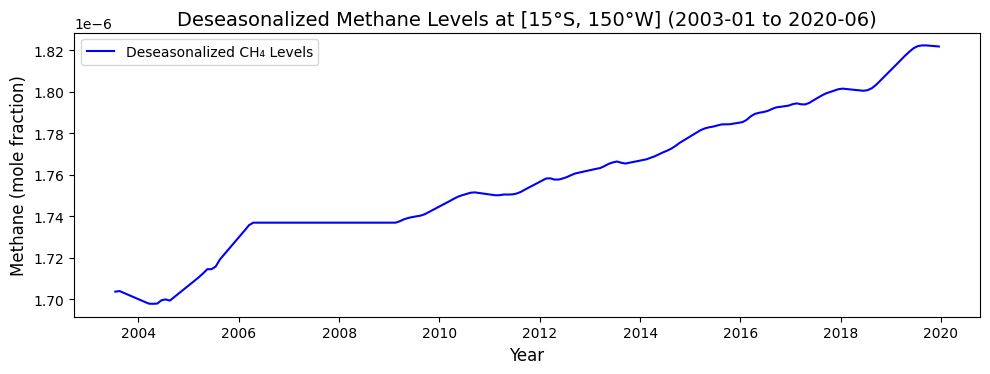

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# 加载数据文件
data = xr.open_dataset(q1_path, 
                       engine="netcdf4")

# 提取目标点的数据，近似匹配 [15°S, 150°W]
point_data = data['xch4'].sel(lat=-15, lon=-150, method='nearest')

print(point_data.values)
# 将数据转换为 pandas 数据框，以便进行时间序列分析
time_series = pd.Series(point_data.values, 
                        index=pd.to_datetime(data['time'].values))

#前向填充（ffill）和后向填充（bfill）填补缺失值，然后再进行线性插值，确保下面进行季节性分解时无缺失值
# NOTE: fillna(method='ffill').fillna(method='bfill') 后已经没有缺失值， 与 interpolate(method='linear') 冲突
time_series_filled = time_series.fillna(method='ffill').fillna(method='bfill').interpolate(method='linear')

#learn from https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html?highlight=seasonal_decompose
# 进行季节性分解，additive模型可以表示成Observed=Trend+Seasonal+Residual
#                其中Trend就可以表示去季节性后的趋势数据
decomposition = seasonal_decompose(time_series_filled, model='additive', period=12)
deseasonalized = decomposition.trend

plt.figure(figsize=(10, 4))
plt.plot(deseasonalized, color='blue', linewidth=1.5, label="Deseasonalized CH₄ Levels")
plt.title("Deseasonalized Methane Levels at [15°S, 150°W] (2003-01 to 2020-06)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Methane (mole fraction)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Niño 3.4 index

The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.
In this problem set, you will use the sea surface temperature (SST) data from NOAA. Download the netCDF4 file (NOAA_NCDC_ERSST_v3b_SST.nc) 

1.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [ ]:
import xarray as xr
import numpy as np

data = xr.open_dataset(q2_path, engine="netcdf4")

# Niño 3.4区域的经纬度范围
lat_range = slice(-5, 5)  # 纬度范围 5N - 5S
lon_range = slice(190, 240)  # 经度范围 170W - 120W (转换为 0-360° 经度)
nino34_sst = data['sst'].sel(lat=lat_range, lon=lon_range)# 选择Niño 3.4区域的数据

# 计算Niño 3.4区域的平均SST
nino34_sst_mean = nino34_sst.mean(dim=['lat', 'lon'])

# climatology
monthly_climatology = nino34_sst_mean.groupby('time.month').mean('time')

# 计算SST异常值（subtract climatology）
anomalies = nino34_sst_mean.groupby('time.month') - monthly_climatology

print(anomalies)

# 保存异常值到新的NetCDF文件
anomalies.to_netcdf("nino34_sst_anomalies.nc")

<xarray.DataArray 'sst' (time: 684)>
array([-3.19580078e-01, -4.68521118e-01, -2.68152237e-01, -1.86965942e-01,
       -1.77598953e-01, -3.57690811e-01, -1.41969681e-01,  1.46579742e-02,
       -1.52217865e-01, -3.79863739e-01, -3.60893250e-01, -2.08698273e-01,
       -1.91473007e-01, -1.34283066e-01, -2.40375519e-01, -1.85125351e-01,
        5.19142151e-02,  2.39383698e-01, -7.03392029e-02, -4.18693542e-01,
       -7.78316498e-01, -7.92383194e-01, -4.96292114e-01, -4.17312622e-01,
       -4.44782257e-01, -4.55940247e-01, -4.36033249e-01, -4.66926575e-01,
       -5.64533234e-01, -4.26885605e-01, -2.76725769e-01, -3.17211151e-01,
       -6.73160553e-01, -6.66116714e-01, -8.17707062e-01, -8.65488052e-01,
       -7.01400757e-01, -3.57038498e-01,  6.96258545e-02,  1.73400879e-01,
       -9.06715393e-02,  7.69157410e-02,  6.87641144e-01,  7.95261383e-01,
        7.12978363e-01,  8.34251404e-01,  9.08538818e-01,  1.08588409e+00,
        8.51554871e-01,  5.23397446e-01, -1.30540848e-01, -6.34

### 1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one.

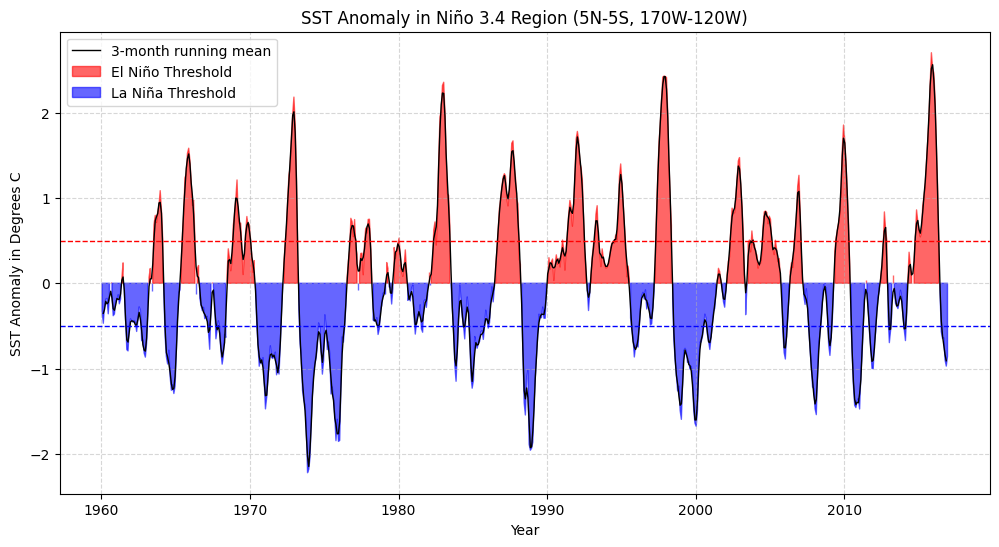

In [18]:
# 计算3个月滑动平均值
rolling_mean = anomalies.rolling(time=3, center=True).mean()

# 可视化计算出的Niño 3.4
plt.figure(figsize=(12, 6))
#每三个月取滑动平均
plt.plot(rolling_mean['time'], rolling_mean, color='black', linewidth=1, 
         label='3-month running mean')
#SST anomalies >= 0
plt.fill_between(anomalies['time'].values, anomalies, 0, where=(anomalies >= 0), 
                 color='red', alpha=0.6, label='El Niño Threshold')
#SST anomalies < 0
plt.fill_between(anomalies['time'].values, anomalies, 0, where=(anomalies < 0), 
                 color='blue', alpha=0.6, label='La Niña Threshold')
#阈值
plt.axhline(0.5, color='red', linestyle='--', linewidth=1)
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=1)

plt.xlabel('Year')
plt.ylabel('SST Anomaly in Degrees C')
plt.title('SST Anomaly in Niño 3.4 Region (5N-5S, 170W-120W)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## 3. Explore a netCDF dataset

Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.

### 3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

DATASET: https://send.cra.moe/file/xXkqfp3l0AEfhAgU/TpzEQqTlsY0OibH9/PS3_3_DATASET.7z

['oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201502_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201503_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201504_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201505_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201506_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201507_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201508_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201509_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201510_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201511_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201512_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201601_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201602_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201603_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201604_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201605_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201606_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201607_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201608_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201609_B10206Ar.nc4', 'oco2_GEOS_L3CO2_month_201610_B10206Ar.nc4', 'oco2_GEO

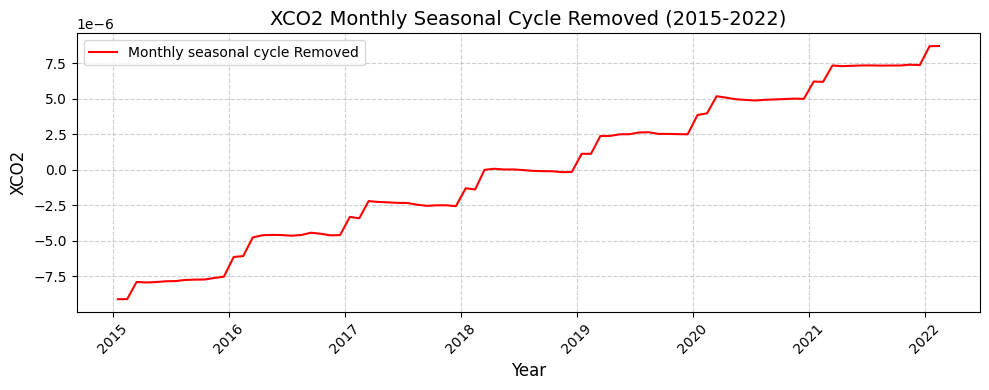

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os

# 定义文件路径和文件名
file_path = '..\\Assignment_rd_common_files\\q3_files\\PS3_3_DATASET\\PS3_3_DATASET'  # 替换为你文件夹的路径
file_list = [f for f in os.listdir(file_path) if f.endswith('.nc4')]
print(file_list)
# 读取所有文件
ds = xr.open_mfdataset([os.path.join(file_path, f) for f in file_list], 
                       combine='by_coords')
print(ds.head)

# 选择要分析的变量，假设使用 'XCO2' 变量
variable_name = 'XCO2'

# 提取变量数据
xco2_data = ds[variable_name]
xco2_data.head

# 计算全球平均xco2
xco2_mean = xco2_data.mean(dim=['lat', 'lon'])

# climatology
monthly_climatology = xco2_mean.groupby('time.month').mean('time')

# 计算xco2去季节化值（subtract climatology）
xco2_anomalies = xco2_mean.groupby('time.month') - monthly_climatology

time = ds['time'].values
plt.figure(figsize=(10, 4))
plt.plot(time, xco2_anomalies, color='red', linewidth=1.5, 
         label="Monthly seasonal cycle Removed")
# plt.fill_between(time, xch4_global_mean, color='pink', alpha=0.3)#填充下部区域

# 设置图表标题和标签
plt.title("XCO2 Monthly Seasonal Cycle Removed (2015-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("XCO2", fontsize=12)
plt.legend()

# 设置日期格式
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

### 3.2 [10 points] Make at least 5 different plots using the dataset.

d:\.conda\ese5023\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


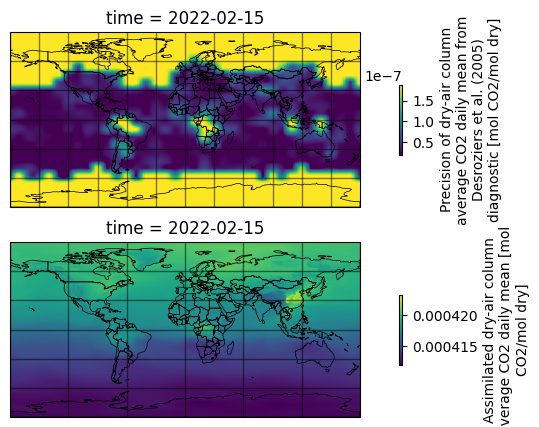

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import hvplot.xarray

# 定义文件路径和文件名
file_path = '..\Assignment_rd_common_files\q3_files\PS3_3_DATASET\PS3_3_DATASET'  # 替换为你文件夹的路径
file_list = [f for f in os.listdir(file_path) if f.endswith('.nc4')]

# 读取所有文件
ds = xr.open_mfdataset([os.path.join(file_path, f) for f in file_list], 
                       combine='by_coords')
XC02_2022 = ds.XCO2.isel(time=-1)
XCO2PREC_2022 = ds.XCO2PREC.isel(time=-1)

# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Create an axes with Orthographic projection style
#proj = ccrs.Orthographic(central_lon, central_lat) 
proj = ccrs.PlateCarree() 


# Plot the XC02_2022
ax1 = plt.subplot(2, 1, 2, projection=proj)
XC02_2022.plot(ax=ax1, transform=ccrs.PlateCarree(), 
               cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax1.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, 
                   color='black', alpha=0.5)

# Plot the XCO2PREC_2022
ax2 = plt.subplot(2, 1, 1, projection=proj)
XCO2PREC_2022.plot(ax=ax2, transform=ccrs.PlateCarree(), 
                   cbar_kwargs={'shrink': 0.4})

# Add border lines over countries 
ax2.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Add lat/lon gridlines, draw gridlines
gl = ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))

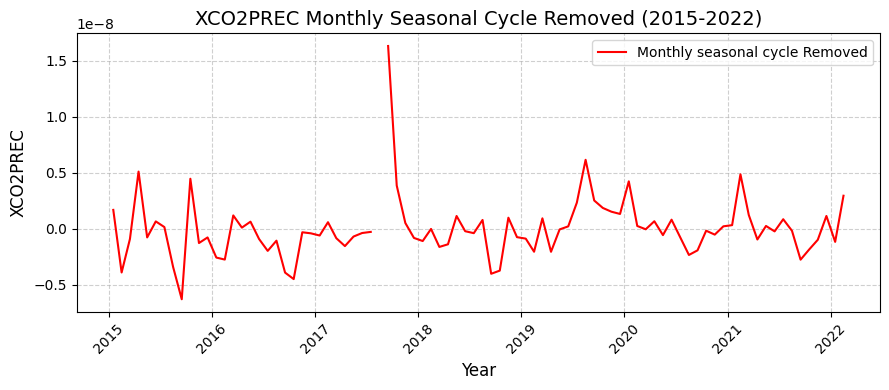

In [3]:
#Plot a time series of XCO2PREC with monthly seasonal cycle removed
# 计算全球平均XCO2PREC
XCO2PREC_mean = ds.XCO2PREC.mean(dim=['lat', 'lon'])

# climatology
monthly_climatology = XCO2PREC_mean.groupby('time.month').mean('time')

# 计算xco2去季节化值（subtract climatology）
XCO2PREC_anomalies = XCO2PREC_mean.groupby('time.month') - monthly_climatology

time = ds['time'].values
plt.figure(figsize=(9, 4))
plt.plot(time, XCO2PREC_anomalies, color='red', linewidth=1.5, 
         label="Monthly seasonal cycle Removed")
# plt.fill_between(time, xch4_global_mean, color='pink', alpha=0.3)#填充下部区域

# 设置图表标题和标签
plt.title("XCO2PREC Monthly Seasonal Cycle Removed (2015-2022)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("XCO2PREC", fontsize=12)
plt.legend()

# 设置日期格式
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()

In [4]:
ds.XCO2.isel(time = -1).hvplot(cmap = "inferno")

:Image   [lon,lat]   (Assimilated dry-air column average CO2 daily mean)

In [5]:
ds.XCO2PREC.isel(time = -1).hvplot(cmap = "viridis")

:Image   [lon,lat]   (Precision of dry-air column average CO2 daily mean from Desroziers et al. (2005) diagnostic)